## Generation of baseline signatures
In this notebook we will generate ubiquitous (housekeeping) signatures that should be overrepresented in every cell type and random signatures that should not be overrepresented in any sample. 

In [29]:
import sys

%load_ext autoreload
%autoreload 1
%aimport pygenesig.validation
%aimport pygenesig.gini
%aimport pygenesig.bioqc
%aimport pygenesig.tools
%aimport pygenesig.perfmeasures
%matplotlib inline

import pandas as pd
import random
from pygenesig.tools import * 
import seaborn as sns
%matplotlib inline
from pylab import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
!ls ../data/baseline/

awesome_housekeepers.csv  README.md  ubiquitous_signatures.gmt


## load ubiquitous signatures

In [38]:
ubiquitous_sig = load_gmt("../data/baseline/ubiquitous_signatures.gmt")

## Make housekeeper signature

In [29]:
housekeepers = pd.read_csv("../data/baseline/awesome_housekeepers.csv", sep=";", skiprows=2, header=None)

In [37]:
hk_genes = list(housekeepers.iloc[:, 1])
hk_sig = {"awesome_housekeepers" : hk_genes}

## make random signatures
#### download hgnc symbols

In [4]:
!cd ../data/baseline/ && wget ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/tsv/hgnc_complete_set.txt

--2017-02-22 14:56:42--  ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/tsv/hgnc_complete_set.txt
           => ‘hgnc_complete_set.txt’
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.192.4
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.192.4|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/databases/genenames/new/tsv ... done.
==> SIZE hgnc_complete_set.txt ... 13848814
==> PASV ... done.    ==> RETR hgnc_complete_set.txt ... done.
Length: 13848814 (13M) (unauthoritative)

100%[======================================>] 13,848,814  6.88MB/s   in 1.9s   

2017-02-22 14:56:44 (6.88 MB/s) - ‘hgnc_complete_set.txt’ saved [13848814]



In [34]:
hgnc = pd.read_csv("../data/baseline/hgnc_complete_set.txt", sep="\t")
symbols = list(hgnc.symbol)

/pstore/apps/Anaconda3/2.5.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (32,34,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
random_sigs_length = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]

#### make signatures

In [6]:
signatures_random = {}
for l in random_sigs_length:
    for i in range(2):
        genes = random.sample(symbols, l)
        signatures_random["random_{}_{}".format(l, i)] = genes

In [9]:
len(symbols)

41818

## merge signatures

In [39]:
baseline_sigs = {**signatures_random, **ubiquitous_sig, **hk_sig}

In [42]:
write_gmt(baseline_sigs, "../results/baseline_signatures.gmt")

# check signatures

In [14]:
gtex_signatures = load_gmt("../results/gtex_ngs_0.85_5.gmt")
baseline_sigs = load_gmt("../results/baseline_signatures.gmt")

In [32]:
df = jaccard_mat(baseline_sigs, gtex_signatures, "baseline", "gtex")

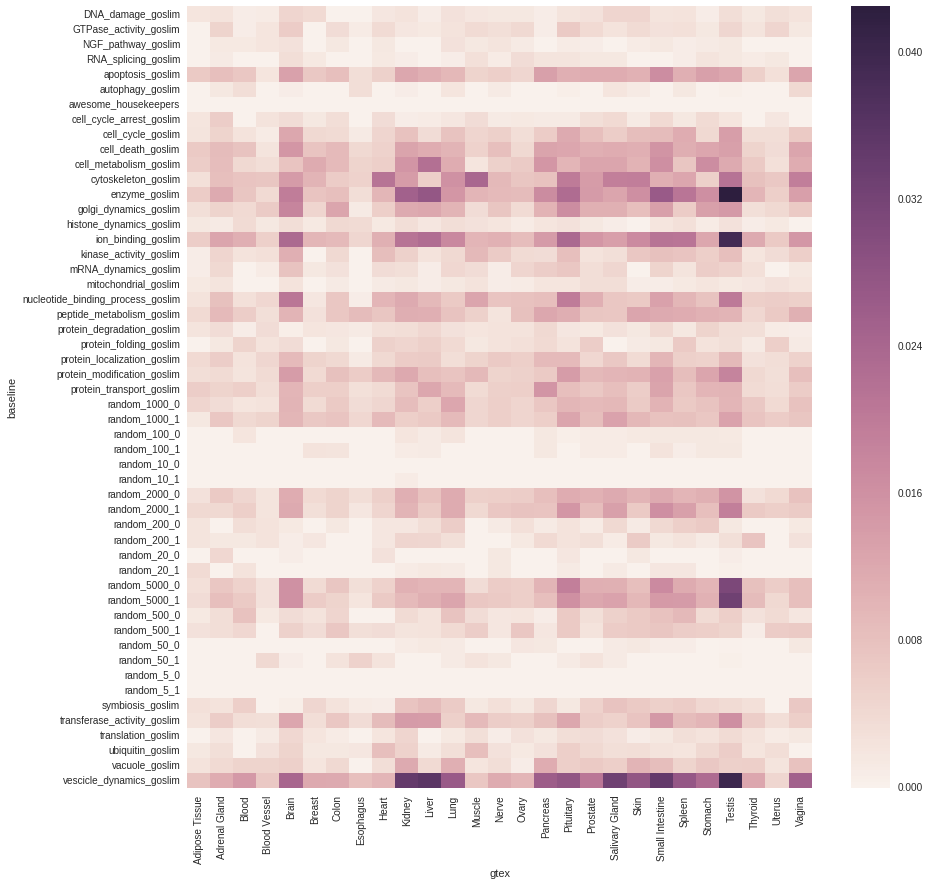

In [33]:
fig, ax = subplots(figsize=(14,14))
sns.heatmap(df.pivot(*df.columns), ax=ax)